In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv("C:/Users/denem/OneDrive/Belgeler/AI/AirPassengers.csv",parse_dates = ['Month'], index_col = ['Month'])
df.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


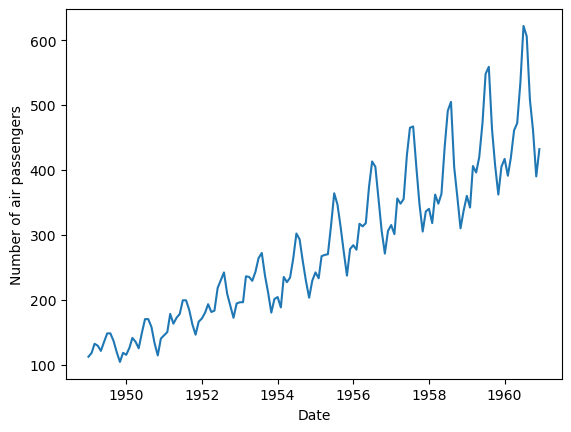

In [3]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)

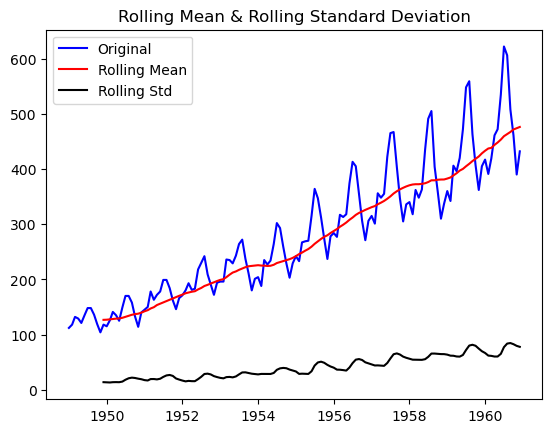

In [4]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


In [5]:
result = adfuller(df['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases.

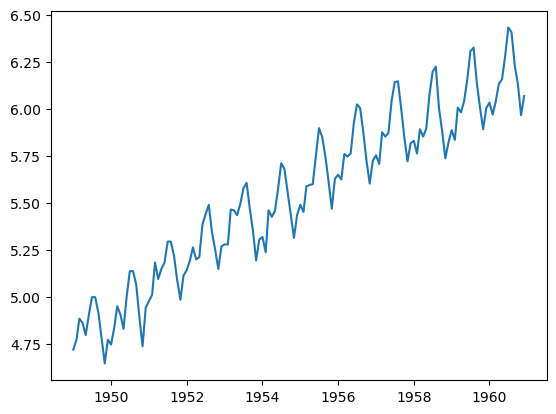

In [6]:
df_log = np.log(df)
plt.plot(df_log)

In [7]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['#Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

Bu kod, bir zaman serisi verisi için istasyonerlik (stationarity) analizi yapmayı amaçlayan bir fonksiyonu içeriyor. Aşağıda adım adım kodun açıklaması bulunmaktadır:

get_stationarity fonksiyonu tanımlanır ve bir zaman serisi verisi (timeseries) alır.

İlk adımda, zaman serisinin hareketli ortalamasını (rolling_mean) ve hareketli standart sapmasını (rolling_std) hesaplamak için rolling fonksiyonu kullanılır. window=12 parametresi ile pencere boyutu 12 olarak belirlenir. Yani, her bir nokta için son 12 veriyi kapsayan bir pencere oluşturulur.

İkinci adımda, orijinal zaman serisini (timeseries), hareketli ortalamayı (rolling_mean) ve hareketli standart sapmayı (rolling_std) farklı renklerde bir çizgi grafiğiyle görselleştirmek için plt.plot kullanılır.

Grafiğin üzerindeki açıklamaları belirtmek için plt.legend kullanılır ve grafiğe başlık eklemek için plt.title kullanılır.

plt.show ile grafiğin görüntülenmesi sağlanır. block=False parametresi, grafiğin gösterildikten sonra kodun durmasını engeller ve işlemlerin devam etmesini sağlar.

Daha sonra, Dickey-Fuller birim kök testi (adfuller) kullanılarak zaman serisinin istasyonerlik özellikleri değerlendirilir. adfuller fonksiyonuna timeseries['Passengers'] ile yolcu sayılarına karşılık gelen sütunu geçirilir.

Test sonucu result değişkenine atanır ve ADF istatistiği (result[0]), p-değeri (result[1]) ve ele alınan kritik değerler (result[4]) ekrana yazdırılır.

Kod, zaman serisi verisi üzerinde hareketli ortalamayı, hareketli standart sapmayı ve istasyonerlik testini gerçekleştirerek veri setinin istasyonerlik özelliklerini değerlendirmeyi amaçlamaktadır.

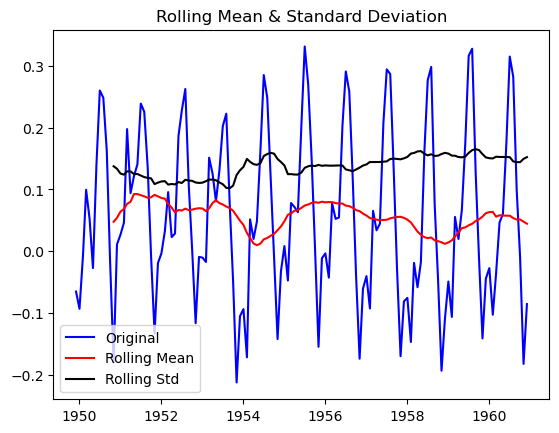

ADF Statistic: -3.1629079913008766
p-value: 0.02223463000124264
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [8]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

Gördüğümüz gibi, ortalamayı çıkardıktan sonra, rolling mean ve standart sapma yaklaşık olarak yataydır. P-değeri 0,05 eşik değerinin altındadır ve ADF İstatistiği kritik değerlere yakındır. Dolayısıyla zaman serisi durağandır.

exponential decay  uygulamak, bir zaman serisini durağan olacak şekilde dönüştürmenin başka bir yoludur.

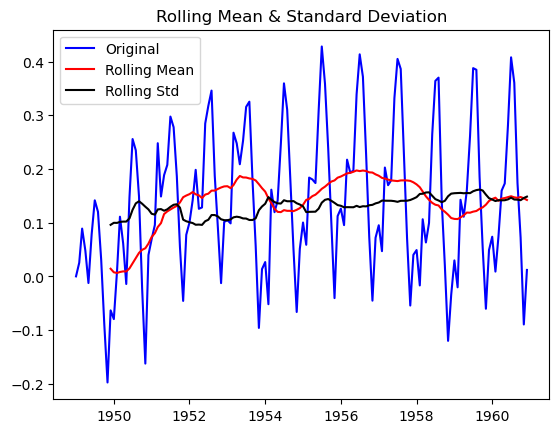

ADF Statistic: -3.6012624201616723
p-value: 0.005736938801511978
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


In [9]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

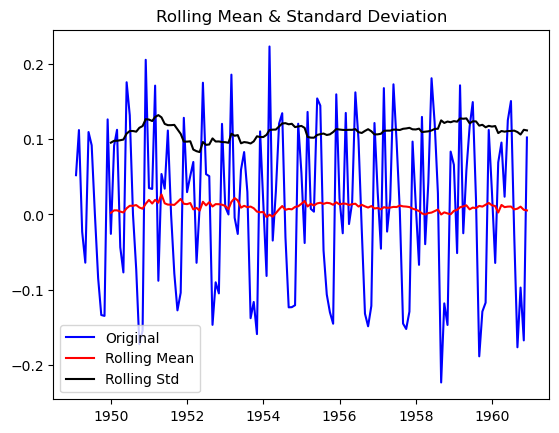

ADF Statistic: -2.7171305983881675
p-value: 0.07112054815085295
Critical Values:
	1%: -3.4825006939887997
	5%: -2.884397984161377
	10%: -2.578960197753906


In [10]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


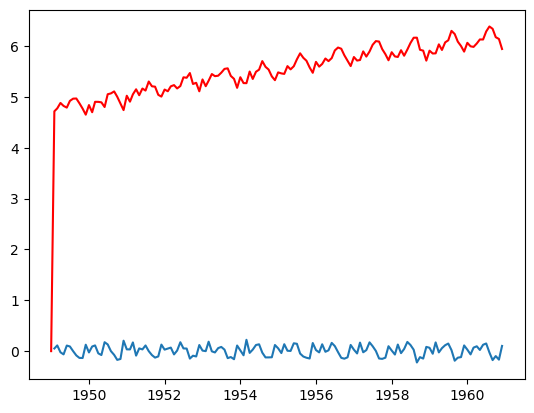

In [11]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit()

plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

In [12]:
len(df)

144

In [13]:
df.isnull().sum()

#Passengers    0
dtype: int64

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Compute the fitted values
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)


In [16]:
# Calculate the cumulative sum of the differences
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()


In [17]:
# Create a Series with the initial value and index of 'df_log'
predictions_ARIMA_log = pd.Series(df_log['#Passengers'].iloc[0], index=df_log.index)


In [18]:

# Add the cumulative sum to the initial value
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)


In [19]:

# Exponentiate the log values to obtain the predictions
predictions_ARIMA = np.exp(predictions_ARIMA_log)


C:\Users\denem\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
# Handle infinite values in the predictions
predictions_ARIMA.replace([np.inf, -np.inf, -0], 0)
predictions_ARIMA.fillna(0, inplace=True)


model.fit(): ARIMA modelinin eğitimini gerçekleştiren bir yöntemdir. Bu adım, veri seti üzerinde ARIMA modelini uygulamak ve model parametrelerini tahmin etmek için kullanılır. Bu satırda, model nesnesi üzerinde fit() yöntemi çağrılır ve model eğitilir. Eğitim işlemi, veri seti üzerindeki mevcut değerleri ve modelin en iyi uyum sağlamasını sağlayacak parametreleri hesaplamak için gerçekleştirilir.

results.fittedvalues: Eğitim işlemi tamamlandıktan sonra, results nesnesi üzerinde fittedvalues özelliği kullanılarak, eğitim veri seti üzerindeki her bir gözlem için model tarafından tahmin edilen değerler elde edilir. Bu tahmin değerleri, ARIMA modelinin eğitim veri setine uygulanmasından elde edilen hedef değişkenin tahmini değerleridir.

predictions_ARIMA_diff: Tahmin edilen fark değerleri (results.fittedvalues) bir pd.Series nesnesine dönüştürülür. Bu, tahmin edilen değerlerin ardışık bir dizi şeklinde saklanmasını sağlar.

predictions_ARIMA_diff_cumsum: Tahmin edilen fark değerlerinin toplamını hesaplamak için cumsum() yöntemi kullanılır. Bu, her bir tahminin birikimli toplamını elde eder.

predictions_ARIMA_log: Tahmin edilen fark değerlerinin kümülatif toplamı, logaritmik dönüşümünü geri almak için kullanılır. İlk tahmin değeri, logaritmik dönüşüm uygulanan veri setindeki ilk değere (ilk yolcu sayısı) eşittir. Bu, logaritmik dönüşümün ters işlemi olarak düşünülebilir.

predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0): Tahmin edilen logaritmik değerlere, kümülatif toplam değerleri eklenir. Bu, orijinal logaritmik dönüşüm uygulanmış veri setinde tahmin edilen yolcu sayılarını elde etmek için yapılır.

predictions_ARIMA: Tahmin edilen logaritmik değerlerin üstel dönüşümü gerçekleştirilerek, orijinal veri setinde tahmin edilen yolcu sayıları elde edilir.
predictions_ARIMA_diff: Tahmin edilen fark değerleri (results.fittedvalues) bir pd.Series nesnesine dönüştürülür. Bu, tahmin edilen değerlerin ardışık bir dizi şeklinde saklanmasını sağlar.

predictions_ARIMA_diff_cumsum: Tahmin edilen fark değerlerinin toplamını hesaplamak için cumsum() yöntemi kullanılır. Bu, her bir tahminin birikimli toplamını elde eder.

predictions_ARIMA_log: Tahmin edilen fark değerlerinin kümülatif toplamı, logaritmik dönüşümünü geri almak için kullanılır. İlk tahmin değeri, logaritmik dönüşüm uygulanan veri setindeki ilk değere (ilk yolcu sayısı) eşittir. Bu, logaritmik dönüşümün ters işlemi olarak düşünülebilir.

predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0): Tahmin edilen logaritmik değerlere, kümülatif toplam değerleri eklenir. Bu, orijinal logaritmik dönüşüm uygulanmış veri setinde tahmin edilen yolcu sayılarını elde etmek için yapılır.

predictions_ARIMA: Tahmin edilen logaritmik değerlerin üstel dönüşümü gerçekleştirilerek, orijinal veri setinde tahmin edilen yolcu sayıları elde edilir.

Sonuç olarak, predictions_ARIMA değişkeni, ARIMA modeli tarafından tahmin edilen yolcu sayılarını içeren bir NumPy dizisidir. Bu tahminler, logaritmik dönüşüm ve ardışık fark alma işlemlerine dayanarak elde edilir ve orijinal veri setine geri dönüştürülür.

In [21]:
inf_elemanlar = predictions_ARIMA[predictions_ARIMA.apply(lambda x: np.isinf(x))]

In [22]:
inf_elemanlar2 = df[df.apply(lambda x: np.isinf(x))]

In [23]:
inf_elemanlar

Month
1959-11-01    inf
1959-12-01    inf
1960-01-01    inf
1960-02-01    inf
1960-03-01    inf
1960-04-01    inf
1960-05-01    inf
1960-06-01    inf
1960-07-01    inf
1960-08-01    inf
1960-09-01    inf
1960-10-01    inf
1960-11-01    inf
1960-12-01    inf
dtype: float64

In [24]:
inf_elemanlar2

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN


In [25]:
predictions_ARIMA

Month
1949-01-01    1.120000e+02
1949-02-01    1.254400e+04
1949-03-01    1.488654e+06
1949-04-01    1.965838e+08
1949-05-01    2.447751e+10
                  ...     
1960-08-01             inf
1960-09-01             inf
1960-10-01             inf
1960-11-01             inf
1960-12-01             inf
Length: 144, dtype: float64

In [26]:
import pandas as pd
import numpy as np

# Fitted değerlerinden tahminleri hesaplayın
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)

# Kumulatif toplamları alın
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

# Log dönüşümünden tahminleri hesaplayın
predictions_ARIMA_log = pd.Series(df_log['#Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

# Eksponansiyel dönüşümü yaparak tahminleri elde edin
predictions_ARIMA = np.exp(predictions_ARIMA_log)


seri = predictions_ARIMA.replace([np.inf, -np.inf], np.nan).dropna()

plt.plot(df)
plt.plot(predictions_ARIMA)
plt.show()


C:\Users\denem\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\denem\anaconda3\lib\site-packages\matplotlib\ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
C:\Users\denem\anaconda3\lib\site-packages\matplotlib\ticker.py:2127: RuntimeWarning: overflow encountered in multiply
  ticks = np.arange(low, high + 1) * step + best_vmin


OverflowError: cannot convert float infinity to integer

<Figure size 640x480 with 1 Axes>

In [27]:
seri = predictions_ARIMA.replace([np.inf, -np.inf], np.nan).dropna()

In [28]:
seri.isnull().sum()

0

In [29]:
seri2 = df.replace([np.inf, -np.inf], np.nan).dropna()

In [30]:
seri2

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [31]:
# Plot the original data and the predictions
plt.plot(df)
plt.plot(seri)
plt.show()

C:\Users\denem\anaconda3\lib\site-packages\matplotlib\ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
C:\Users\denem\anaconda3\lib\site-packages\matplotlib\ticker.py:2127: RuntimeWarning: overflow encountered in multiply
  ticks = np.arange(low, high + 1) * step + best_vmin


OverflowError: cannot convert float infinity to integer

<Figure size 640x480 with 1 Axes>

In [32]:
seri.plot_predict(1,264)

AttributeError: 'Series' object has no attribute 'plot_predict'

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 128.890
Date:                Thu, 08 Jun 2023   AIC                           -247.780
Time:                        10:57:07   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2432      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2677      0.199      1.344      0.179      -0.123       0.658
ma.L1         -0.0867      0.118     -0.732      0.464      -0.319       0.145
ma.L2         -0.6813      0.142     -4.785      0.000      -0.960      -0.402
sigma2         0.0096      0.002      5.730      0.000       0.006       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.04
Prob(Q):                              0.94   Prob(JB):                         0.03
Heteroskedasticity (H):               1.08   Skew:                            -0.06
Prob(H) (two-sided):                  0.79   Kurtosis:                         1.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

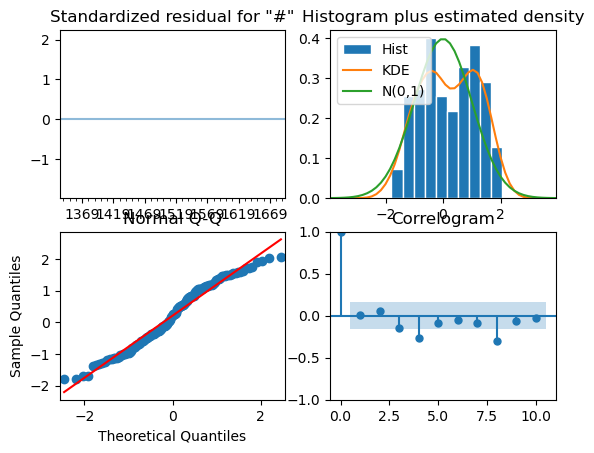

In [34]:
results.plot_diagnostics()
plt.show()

In [35]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


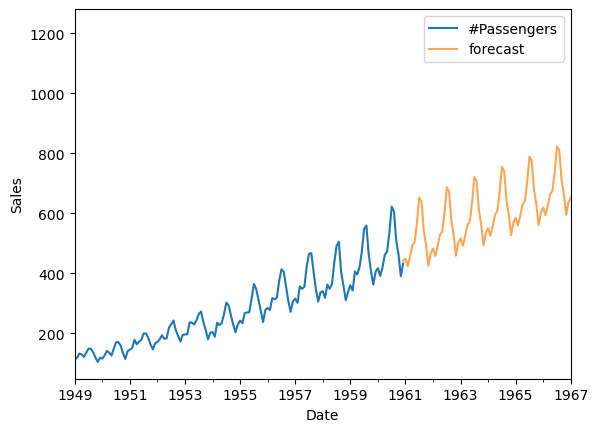

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define the model
model = SARIMAX(df, order=(2, 1, 3), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
pred = results.get_prediction(start='1960-12-01', end='1966-12-10')
pred_ci = pred.conf_int()

# Plot the results
ax = df.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [37]:
df=pd.read_csv("C:/Users/denem/OneDrive/Belgeler/AI/OykBlFarnSstmFn.csv")

In [38]:
df.head()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
0,2022-06-27 11:35:00,2.3975,1.7435,0.448,50.4,2.685,NaN
1,2022-06-27 11:40:00,2.3110,1.8080,0.524,49.9,2.480,NaN
2,2022-06-27 11:45:00,2.3520,1.7020,0.451,50.5,2.570,NaN
3,2022-06-27 11:55:00,2.4500,1.6380,0.469,50.4,2.460,NaN
4,2022-06-27 12:00:00,2.3680,1.7200,0.436,50.8,2.290,NaN


In [39]:
df["cf"]=df["cf"].fillna(0)
df["maxCf"]=df["maxCf"].fillna(0)

In [40]:
df["cf"].isnull().sum()
df["maxCf"].isnull().sum()

0

In [41]:
df["newCF"]=df["cf"]+df["maxCf"]

In [42]:
df.isnull().sum()

time     0
xVRMS    3
yVRMS    3
zVRMS    3
temp     3
cf       0
maxCf    0
newCF    0
dtype: int64

In [43]:
del(df["cf"])
del(df["maxCf"])

In [44]:
len(df)

84542

In [45]:
def clean_limit(df_column, low_limit, up_limit=None):
    if up_limit is None:
        filtered = df_column[(df_column >= low_limit)]
        
    else:
        filtered = df_column.loc[(df_column >= low_limit) & (df_column <= up_limit)]
    return filtered

In [46]:
df_x=clean_limit(df["xVRMS"],low_limit=0.5)

In [47]:
len(df_x)

58685

In [48]:
slct_df = df.loc[df_x.index]


In [49]:
len(slct_df)

58685

In [50]:
slct_df.head()

,time,xVRMS,yVRMS,zVRMS,temp,newCF
0,2022-06-27 11:35:00,2.3975,1.7435,0.448,50.4,2.685
1,2022-06-27 11:40:00,2.3110,1.8080,0.524,49.9,2.480
2,2022-06-27 11:45:00,2.3520,1.7020,0.451,50.5,2.570
3,2022-06-27 11:55:00,2.4500,1.6380,0.469,50.4,2.460
4,2022-06-27 12:00:00,2.3680,1.7200,0.436,50.8,2.290


In [51]:
slct_df.index = pd.to_datetime(slct_df["time"])

In [52]:
slct_df.head()

,time,xVRMS,yVRMS,zVRMS,temp,newCF
time,,,,,,
2022-06-27 11:35:00,2022-06-27 11:35:00,2.3975,1.7435,0.448,50.4,2.685
2022-06-27 11:40:00,2022-06-27 11:40:00,2.3110,1.8080,0.524,49.9,2.480
2022-06-27 11:45:00,2022-06-27 11:45:00,2.3520,1.7020,0.451,50.5,2.570
2022-06-27 11:55:00,2022-06-27 11:55:00,2.4500,1.6380,0.469,50.4,2.460
2022-06-27 12:00:00,2022-06-27 12:00:00,2.3680,1.7200,0.436,50.8,2.290


In [53]:
slct_df=slct_df.sort_index()

In [54]:
slct_df.tail()

,time,xVRMS,yVRMS,zVRMS,temp,newCF
time,,,,,,
2023-04-24 21:10:00,2023-04-24 21:10:00,4.53544,1.29829,0.56662,36.75691,2.65577
2023-04-24 21:15:00,2023-04-24 21:15:00,4.50937,1.31912,0.56388,36.65746,2.52265
2023-04-24 21:20:00,2023-04-24 21:20:00,4.41924,1.30684,0.57673,36.65746,2.50599
2023-04-24 21:25:00,2023-04-24 21:25:00,4.49352,1.29751,0.55253,36.40331,2.59193
2023-04-24 21:30:00,2023-04-24 21:30:00,4.53100,1.29188,0.54812,37.02210,2.54949


In [55]:
# Index'i sıfırdan başlayarak artan bir diziye dönüştürmek
slct_df.index = pd.RangeIndex(start=0, stop=len(slct_df), step=1)

In [56]:
len(slct_df)

58685

In [57]:
import pandas as pd



# Başlangıç tarihi
baslangic_tarihi = pd.to_datetime('2020-01-01')

# Yeni sütunun adı
sütun_adı = 'Tarih'

# Boş bir liste oluşturma
tarih_listesi = []

# Index üzerinde döngü
for index in slct_df.index:
    tarih = baslangic_tarihi + pd.to_timedelta(index)
    tarih_listesi.append(tarih.strftime('%Y-%m-%d'))

# Listeyi DataFrame'e ekleme
slct_df[sütun_adı] = tarih_listesi

# Sonucu gösterme
print(slct_df)


                      time    xVRMS    yVRMS    zVRMS      temp    newCF  \
0      2022-06-27 11:35:00  2.39750  1.74350  0.44800  50.40000  2.68500   
1      2022-06-27 11:40:00  2.31100  1.80800  0.52400  49.90000  2.48000   
2      2022-06-27 11:45:00  2.35200  1.70200  0.45100  50.50000  2.57000   
3      2022-06-27 11:55:00  2.45000  1.63800  0.46900  50.40000  2.46000   
4      2022-06-27 12:00:00  2.36800  1.72000  0.43600  50.80000  2.29000   
...                    ...      ...      ...      ...       ...      ...   
58680  2023-04-24 21:10:00  4.53544  1.29829  0.56662  36.75691  2.65577   
58681  2023-04-24 21:15:00  4.50937  1.31912  0.56388  36.65746  2.52265   
58682  2023-04-24 21:20:00  4.41924  1.30684  0.57673  36.65746  2.50599   
58683  2023-04-24 21:25:00  4.49352  1.29751  0.55253  36.40331  2.59193   
58684  2023-04-24 21:30:00  4.53100  1.29188  0.54812  37.02210  2.54949   

            Tarih  
0      2020-01-01  
1      2020-01-01  
2      2020-01-01  
3      

In [58]:
slct_df.head()

,time,xVRMS,yVRMS,zVRMS,temp,newCF,Tarih
0,2022-06-27 11:35:00,2.3975,1.7435,0.448,50.4,2.685,2020-01-01
1,2022-06-27 11:40:00,2.3110,1.8080,0.524,49.9,2.480,2020-01-01
2,2022-06-27 11:45:00,2.3520,1.7020,0.451,50.5,2.570,2020-01-01
3,2022-06-27 11:55:00,2.4500,1.6380,0.469,50.4,2.460,2020-01-01
4,2022-06-27 12:00:00,2.3680,1.7200,0.436,50.8,2.290,2020-01-01


In [59]:
slct_df["Tarih"]=pd.to_datetime(slct_df["Tarih"])

In [60]:
slct_df["new_date"] = slct_df["Tarih"] + pd.Timedelta("1D")

In [61]:
slct_df["new_date"] =pd.date_range(freq="D", periods=len(slct_df), start="2020-01-02")

In [62]:
sl

NameError: name 'sl' is not defined

In [63]:
slct_df

,time,xVRMS,yVRMS,zVRMS,temp,newCF,Tarih,new_date
0,2022-06-27 11:35:00,2.39750,1.74350,0.44800,50.40000,2.68500,2020-01-01,2020-01-02
1,2022-06-27 11:40:00,2.31100,1.80800,0.52400,49.90000,2.48000,2020-01-01,2020-01-03
2,2022-06-27 11:45:00,2.35200,1.70200,0.45100,50.50000,2.57000,2020-01-01,2020-01-04
3,2022-06-27 11:55:00,2.45000,1.63800,0.46900,50.40000,2.46000,2020-01-01,2020-01-05
4,2022-06-27 12:00:00,2.36800,1.72000,0.43600,50.80000,2.29000,2020-01-01,2020-01-06
...,...,...,...,...,...,...,...,...
58680,2023-04-24 21:10:00,4.53544,1.29829,0.56662,36.75691,2.65577,2020-01-01,2180-08-30
58681,2023-04-24 21:15:00,4.50937,1.31912,0.56388,36.65746,2.52265,2020-01-01,2180-08-31
58682,2023-04-24 21:20:00,4.41924,1.30684,0.57673,36.65746,2.50599,2020-01-01,2180-09-01
58683,2023-04-24 21:25:00,4.49352,1.29751,0.55253,36.40331,2.59193,2020-01-01,2180-09-02


In [64]:
slct_df.index= pd.to_datetime(slct_df["new_date"])

In [65]:
slct_df

,time,xVRMS,yVRMS,zVRMS,temp,newCF,Tarih,new_date
new_date,,,,,,,,
2020-01-02,2022-06-27 11:35:00,2.39750,1.74350,0.44800,50.40000,2.68500,2020-01-01,2020-01-02
2020-01-03,2022-06-27 11:40:00,2.31100,1.80800,0.52400,49.90000,2.48000,2020-01-01,2020-01-03
2020-01-04,2022-06-27 11:45:00,2.35200,1.70200,0.45100,50.50000,2.57000,2020-01-01,2020-01-04
2020-01-05,2022-06-27 11:55:00,2.45000,1.63800,0.46900,50.40000,2.46000,2020-01-01,2020-01-05
2020-01-06,2022-06-27 12:00:00,2.36800,1.72000,0.43600,50.80000,2.29000,2020-01-01,2020-01-06
...,...,...,...,...,...,...,...,...
2180-08-30,2023-04-24 21:10:00,4.53544,1.29829,0.56662,36.75691,2.65577,2020-01-01,2180-08-30
2180-08-31,2023-04-24 21:15:00,4.50937,1.31912,0.56388,36.65746,2.52265,2020-01-01,2180-08-31
2180-09-01,2023-04-24 21:20:00,4.41924,1.30684,0.57673,36.65746,2.50599,2020-01-01,2180-09-01


C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


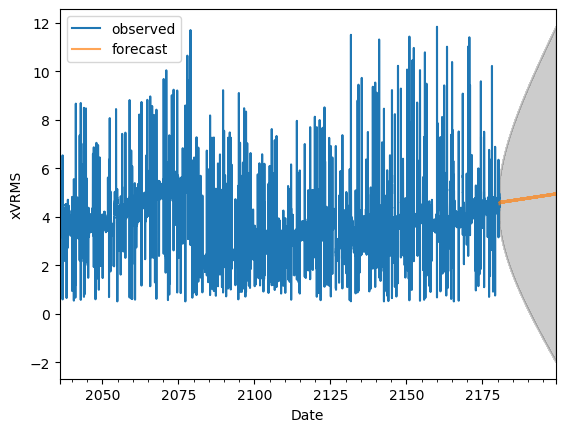

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define the model
model = SARIMAX(slct_df["xVRMS"][5840:], order=(2,1,3), seasonal_order=(1, 1, 1, 12))

# Fit the model
results = model.fit()

# Make predictions
pred = results.get_prediction(start='2180-09-03', end='2199-02-25')
pred_ci = pred.conf_int()

# Plot the results
ax = slct_df["xVRMS"][5840:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('xVRMS')
plt.legend()
plt.show()

In [67]:
!pip install pmdarima


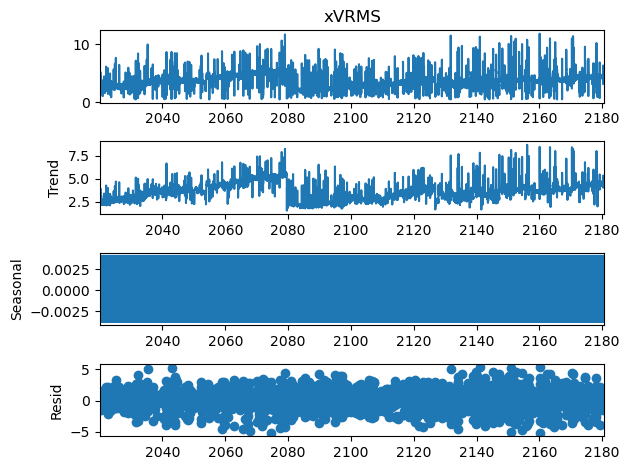

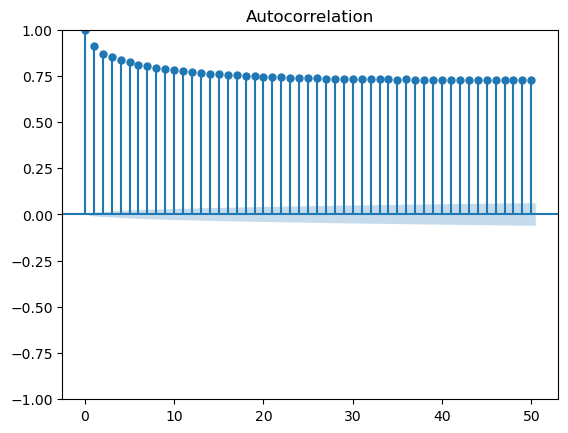

C:\Users\denem\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


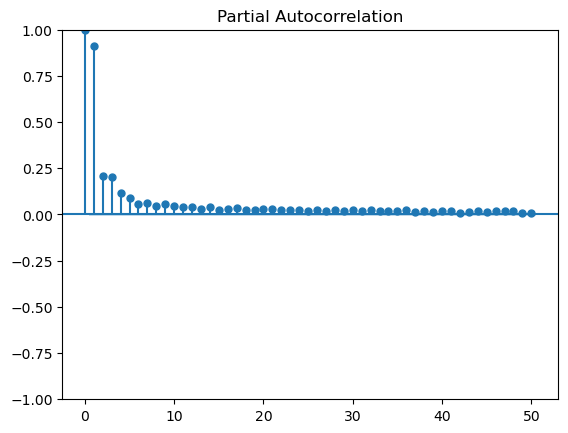

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=61332.682, Time=4.66 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57712.641, Time=2.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=54809.948, Time=3.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=61330.683, Time=1.74 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=51090.566, Time=14.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=50906.342, Time=39.62 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=54619.248, Time=3.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=50211.817, Time=50.82 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=53592.531, Time=3.78 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=50104.355, Time=56.76 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=53009.369, Time=4.86 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=50038.879, Time=63.90 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=52751.059, Time=5.93 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=50064.805, Time=102.81 sec
 ARIMA(4,1,2

In [68]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima

# Load data

y = slct_df["xVRMS"]

# Check for seasonality
result = seasonal_decompose(y, model='additive')
result.plot()
plt.show()

# The plot shows no seasonality, so s=0

# Check ACF and PACF plots
plot_acf(y, lags=50)
plt.show()

plot_pacf(y, lags=50)
plt.show()

# The plots suggest AR(1) and MA(1) terms, so p=1 and q=1

# Use auto_arima to find the optimal parameters
model1 = auto_arima(y, start_p=0, start_q=0,
                   max_p=5, max_q=5,
                   seasonal=False,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

print(model1.summary())

# The summary shows the optimal parameters are (1,1,1)


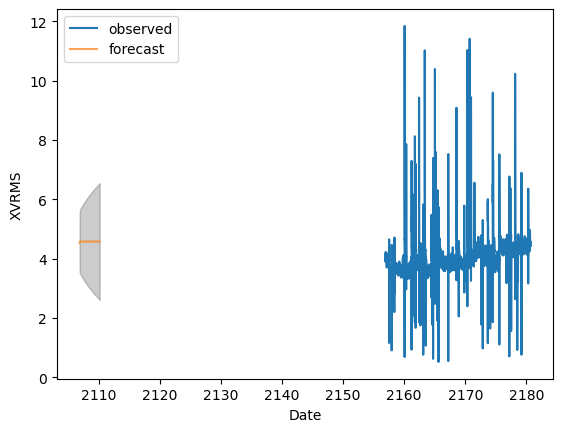

In [69]:
# Make predictions
pred = model1.predict(n_periods=1200) # Predict the next 1200 points
pred_ci = np.asarray(model1.predict(n_periods=1200, return_conf_int=True)[1]) # Get the confidence intervals

# Plot the results
plt.plot(y[50000:], label='observed')
plt.plot(np.arange(50000, 50000+len(pred)), pred, label='forecast', alpha=.7)
plt.fill_between(np.arange(50000, 50000+len(pred)),
                pred_ci[:, 0],
                pred_ci[:, 1], color='k', alpha=.2)
plt.xlabel('Date')
plt.ylabel('XVRMS')
plt.legend()
plt.show()
